<h1 align="center">Smart Car</h1> 
<h3 align="center">Inteligencia Artificial - WS7A</h3> 

## Auto autónomo utilizando Redes Neuronales Artificiales (RNA)

#### 1. Importar librerías

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import copy

#### 2. Inicializar datos de entrenamiento

El arreglo x continene diferentes estados de los 4 sensores (UP, DOWN, LEFT, RIGHT) para el entrenamiento. Donde los valores son: 
>0.0: 	Cuando no hay obstáculos próximos en esa dirección, la posición del obstáculo es mayor a 4 unidades de distancia.

>0.5:	Cuando hay obstáculos próximos en esa dirección, la posición del obstáculo es menor o igual a 4 y mayor a 2 unidades de distancia.

>1.0: 	Cuando hay obstáculos cerca en esa dirección, la posición del obstáculo es menor o igual a 2 unidades de distancia.

El arreglo y continene la salida de los 2 movimientos (UP/DOWN, LEFT/RIGHT) del auto correspondiente a los estados de x. Donde los valores son:
>0: 	El auto no se moverá en ese “eje”.

>1:	El auto se moverá a la primera dirección del eje (arriba en UP/DOWN y a la izquierda en LEFT/RIGHT).

>-1: 	El auto se moverá a la segunda dirección del eje (abajo en UP/DOWN y a la derecha en LEFT/RIGHT).


In [2]:
arr=[0.0,0.5,1.0]
r=4
x0 = list(product(arr, repeat=r))
x1 = []
for i in x0:
  x1.append(list(i))
x1.pop(-1)

x = np.array(x1)
y = np.array([[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[1,	-1],
[1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[-1,	-1],
[-1,	1],
[0,	-1],
[-1,	-1],
[-1,	1],
[0,	-1],
[-1,	-1],
[-1,	0],
[0,	-1],
[0,	1],
[0,	1],
[0,	-1],
[0,	-1],
[0,	1],
[0,	-1],
[0,	-1]
])

#### 3. Construir arquitectura de la Red Neuronal

La red consiste en:

Una capa de entrada con 4 neuronas.

Dos capas oculta con 4 neuronas.

Dos neuronas en la capa de salida.


In [3]:
oculta1 = tf.keras.layers.Dense(units=4, input_shape=[4])
oculta2 = tf.keras.layers.Dense(units=4)
salida = tf.keras.layers.Dense(units=2)

#### 4. Crear el modelo

Creamos nuestro modelo, utilizando el optimizador "Adam" y "mean_squared_error" para evaluar el resultado

In [4]:
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

#### 5. Entrenar el modelo

Realizamos el entrenamiento de la red utilizando la funcion fit del modelo creado con 1000 epochs o iteraciones.


In [5]:
historial = modelo.fit(x, y, epochs=1000, verbose=False)
print("Success")

Success


#### 6. Visualización del entrenamiento

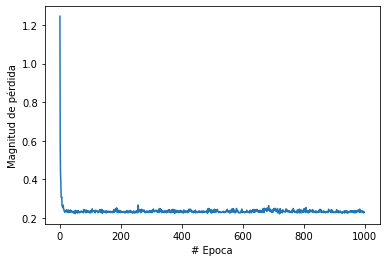

In [6]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

#### 7. Prueba de uso

Para probar el modelo ya entrenado, definimos un mapa con obstáculos de ejemplo, donde: 

0: representa espacio libre

1: representa espacio con obstáculo

2: representa espacio objetivo



In [7]:
# *Para realizar otras pruebas modificar esta variable
strLaberinto = """
11111111111111111111111111111111
10000100000000000000000000000001
10000100000000000000000000000001
10000100000000000000000000000001
10000100000000000000001111100001
10000000000000000000000000100001
10000000000000000000000000100001
10000000000000000000000000100001
10000000000100000000000000100001
10000000000100000000000000100001
11111111111111110000000000100001
10000000000000000000000000000001
10000000000000000000000000000201
10000000000000000000000000000001
10000000000000000000000000000001
10000000000000000000000000000001
11111111111111111111111111111111
"""

17 32


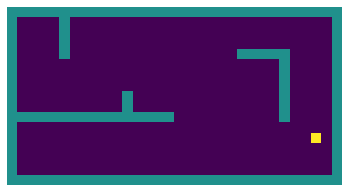

In [9]:
Laberinto = [[int(c) for c in line] for line in strLaberinto.strip().split('\n')]
plt.axis('off')
plt.imshow(Laberinto)
n = len(Laberinto)
m = len(Laberinto[0])
print(n,m)

Partiendo de la posición (1;1) y teniendo como destino la posición (12;29),
se va a iterar con un máximo de 100 movimientos* :

> Calcular los estados de los sensores respecto a los obstaculos del mapa/laberinto

>Con los estados actuales y el modelo se realiza la predicción del movimiento a realizar

>Se actualizan las posiciones (se mueve el auto)

>Si se llego a la posicion destino, se sale del bucle





*Se toma un máximo de movimientos debido a que en algunos casos la posicion de los obstaculos va a hacer imposible que el auto llegue a su destino pero se va a mantener dando vueltas de forma infinita esquivando obstaculos o "evitando chocarse".

In [10]:
pos_x = 1
pos_y = 1
pos = []
pos.append([pos_x, pos_y])
print("Posicion Inicial:",pos_x,pos_y)
for i in range(100):

  # Medicion de los sensores
  up, down, left, right = 0.0, 0.0, 0.0, 0.0

  if(pos_x<=4 or (pos_x>4 and (Laberinto[pos_x-3][pos_y]==1 or Laberinto[pos_x-4][pos_y]==1))):    
    up = 0.5
  if(pos_x<=2 or (pos_x>2 and (Laberinto[pos_x-1][pos_y]==1 or Laberinto[pos_x-2][pos_y]==1))):
    up = 1.0
  
  if(n-4<=pos_x or (pos_x<n-4 and (Laberinto[pos_x+3][pos_y]==1 or Laberinto[pos_x+4][pos_y]==1))):    
    down = 0.5
  if(n-2<=pos_x or (pos_x<n-2 and (Laberinto[pos_x+1][pos_y]==1 or Laberinto[pos_x+2][pos_y]==1))):
    down = 1.0 
  
  if(pos_y<=4 or (pos_y>4 and (Laberinto[pos_x][pos_y-3]==1 or Laberinto[pos_x][pos_y-4]==1))):    
    left = 0.5
  if(pos_y<=2 or (pos_y>2 and (Laberinto[pos_x][pos_y-1]==1 or Laberinto[pos_x][pos_y-2]==1))):
    left = 1.0

  if(m-4<=pos_y or (pos_y<m-4 and (Laberinto[pos_x][pos_y+3]==1 or Laberinto[pos_x][pos_y+4]==1))):    
    right = 0.5
  if(m-2<=pos_y or (pos_y<m-2 and (Laberinto[pos_x][pos_y+1]==1 or Laberinto[pos_x][pos_y+2]==1))):
    right = 1.0 

  # Predicción
  aux = [up, down, left, right]  
  mov = modelo.predict([aux])
  dx = round(mov[0][0])
  dy = round(mov[0][1])

  # Movimiento
  if(dx==0 and dy==0):
    dx=y[x1.index(aux)][0]
    dy=y[x1.index(aux)][1]
  pos_x -= dx
  pos_y -= dy
  pos.append([pos_x, pos_y])
  print("Iteracion:",i+1)  
  print("Sensores:",up,down,left,right)
  print("Movimiento:",dx, dy)
  print("Posicion:",pos_x,pos_y)
  print('')

  # Evaluar nueva posición
  if(pos_x==12 and pos_y==29):
    print('Se llego al destino')
    break

print('Fin')  

Posicion Inicial: 1 1
Iteracion: 1
Sensores: 1.0 0.0 1.0 0.5
Movimiento: -1 -1
Posicion: 2 2

Iteracion: 2
Sensores: 1.0 0.0 1.0 0.5
Movimiento: -1 -1
Posicion: 3 3

Iteracion: 3
Sensores: 0.5 0.0 0.5 1.0
Movimiento: -1 0
Posicion: 4 3

Iteracion: 4
Sensores: 0.5 0.0 0.5 1.0
Movimiento: -1 0
Posicion: 5 3

Iteracion: 5
Sensores: 0.0 0.0 0.5 0.0
Movimiento: 0 -1
Posicion: 5 4

Iteracion: 6
Sensores: 0.0 0.0 0.5 0.0
Movimiento: 0 -1
Posicion: 5 5

Iteracion: 7
Sensores: 1.0 0.0 0.0 0.0
Movimiento: -1 -1
Posicion: 6 6

Iteracion: 8
Sensores: 0.0 0.5 0.0 0.0
Movimiento: 0 -1
Posicion: 6 7

Iteracion: 9
Sensores: 0.0 0.5 0.0 0.0
Movimiento: 0 -1
Posicion: 6 8

Iteracion: 10
Sensores: 0.0 0.5 0.0 0.0
Movimiento: 0 -1
Posicion: 6 9

Iteracion: 11
Sensores: 0.0 0.5 0.0 0.0
Movimiento: 0 -1
Posicion: 6 10

Iteracion: 12
Sensores: 0.0 0.5 0.0 0.0
Movimiento: 0 -1
Posicion: 6 11

Iteracion: 13
Sensores: 0.0 1.0 0.0 0.0
Movimiento: 1 -1
Posicion: 5 12

Iteracion: 14
Sensores: 0.0 0.0 0.0 0.0
Movim

#### 8. Visualización Gráfica del proceso anterior

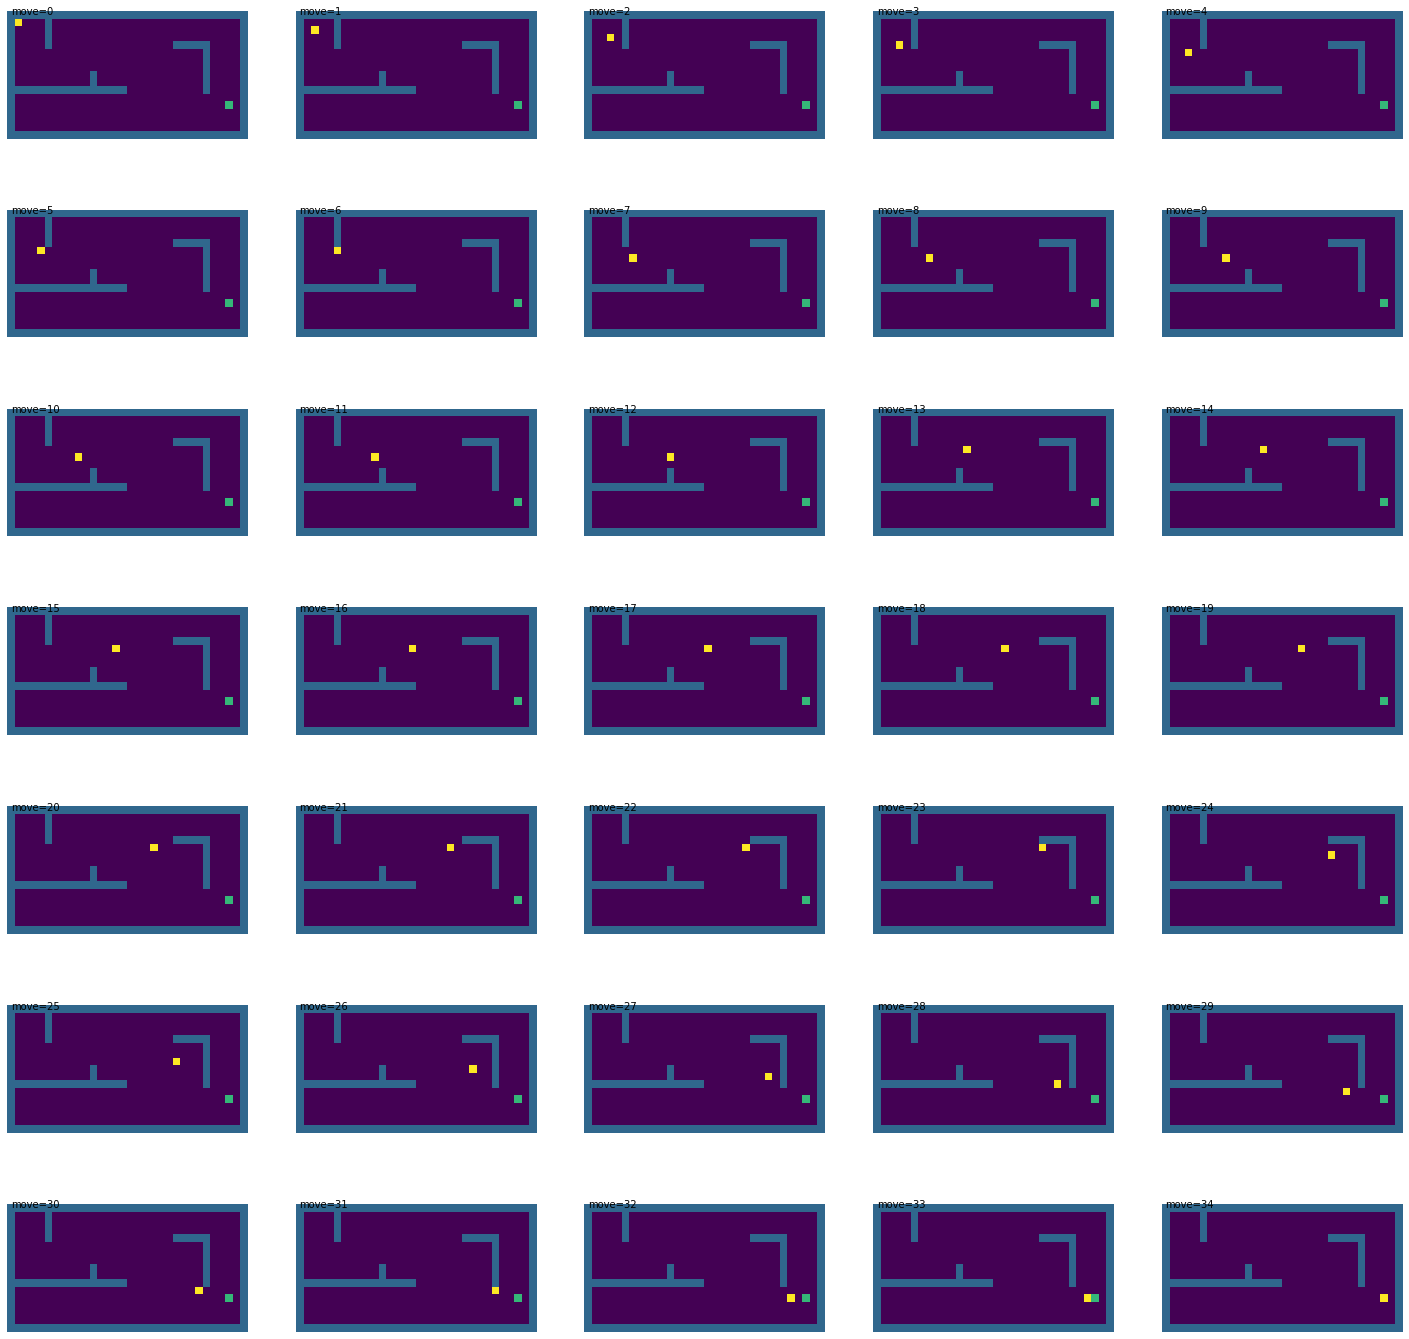

In [11]:
n_pos=len(pos)
fig = plt.figure(figsize=(25, 25))
for move in range(n_pos):
  a = fig.add_subplot(7, 5, move+1)  
  plt.axis('off')
  L = copy.deepcopy(Laberinto)  
  L[pos[move][0]][pos[move][1]]=3
  plt.imshow(L)
  plt.text(0, 0, f"move={move}")
plt.show()

Se tuvo inconvenientes para vincular de forma directa a una interfaz gráfica de usuario. Lo que adicionalmente se logró fue utilizar los datos de salida de 2 ejemplos ejecutados en este cuaderno para realizar una interfaz a nivel web en la siguiente pagina: https://moral-agents.github.io/TB2-IA/ 

In [ ]:
# Laberinto de un segundo caso / ejemplo
strLaberinto2 = """
11111111111111111111111111111111
10000000000000000000000000000001
10000000000000000000000000000001
10000000000000000000001000000001
11111000000000000000001000000001
10000000000000000000001000000001
10000000000000000000001111111111
10000000000000000000001000000001
10000000000000000000000000000001
10000000000000000000000000000001
10000000000010000000000000000001
10000000000011100000000000000001
10000000000010000000000000000201
10000000000010000000000000000001
10000000000010000000000000000001
10000000000010000000000000000001
11111111111111111111111111111111
"""